In [5]:
import matplotlib
matplotlib.rc("text", usetex=True)
matplotlib.rc("font", family="serif")
import matplotlib.pyplot as plt
import matplotlib.colors as colors

import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
import h5py
import os
import sys
sys.path.append('.')
from datalib import Data, flag_to_species
from scipy.ndimage import gaussian_filter1d

In [6]:
# This loads the data from the target directory into python
data = Data('../problems/two_stream/bin/Data/')
print(data.conf)
print(data.fld_steps[-1])

fld keys are: ['B1', 'B2', 'B3', 'B_sqr', 'E1', 'E2', 'E3', 'E_sqr', 'J1', 'J2', 'J3', 'Rho_e', 'Rho_p', 'divB', 'divE', 'flux', 'flux_e1', 'flux_e2', 'flux_e3', 'flux_e4', 'flux_p1', 'flux_p2', 'flux_p3', 'flux_p4', 'step', 'stress_e1', 'stress_e10', 'stress_e2', 'stress_e3', 'stress_e4', 'stress_e5', 'stress_e6', 'stress_e7', 'stress_e8', 'stress_e9', 'stress_p1', 'stress_p10', 'stress_p2', 'stress_p3', 'stress_p4', 'stress_p5', 'stress_p6', 'stress_p7', 'stress_p8', 'stress_p9', 'time', 'B', 'J']
ptc keys are: ['step', 'time', 'tracked_ptc_E', 'tracked_ptc_flag', 'tracked_ptc_id', 'tracked_ptc_p1', 'tracked_ptc_p2', 'tracked_ptc_p3', 'tracked_ptc_weight', 'tracked_ptc_x1', 'tracked_ptc_x2', 'tracked_ptc_x3']
{'log_level': 0, 'num_species': 2, 'ion_mass': 1.0, 'max_ptc_num': 1000000, 'max_ph_num': 1000, 'ptc_buffer_size': 500000, 'ptc_segment_size': 100000, 'max_tracked_num': 1000000, 'dt': 0.002, 'q_e': 1.0, 'current_smoothing': 1, 'use_pml': True, 'max_steps': 16000, 'fld_output_in

fld keys are: ['B1', 'B2', 'B3', 'B_sqr', 'E1', 'E2', 'E3', 'E_sqr', 'J1', 'J2', 'J3', 'Rho_e', 'Rho_p', 'divB', 'divE', 'flux', 'flux_e1', 'flux_e2', 'flux_e3', 'flux_e4', 'flux_p1', 'flux_p2', 'flux_p3', 'flux_p4', 'step', 'stress_e1', 'stress_e10', 'stress_e2', 'stress_e3', 'stress_e4', 'stress_e5', 'stress_e6', 'stress_e7', 'stress_e8', 'stress_e9', 'stress_p1', 'stress_p10', 'stress_p2', 'stress_p3', 'stress_p4', 'stress_p5', 'stress_p6', 'stress_p7', 'stress_p8', 'stress_p9', 'time', 'B', 'J']
ptc keys are: ['step', 'time', 'tracked_ptc_E', 'tracked_ptc_flag', 'tracked_ptc_id', 'tracked_ptc_p1', 'tracked_ptc_p2', 'tracked_ptc_p3', 'tracked_ptc_weight', 'tracked_ptc_x1', 'tracked_ptc_x2', 'tracked_ptc_x3']
31.999999999993143
(5098,)
[3.1210706e-03 6.5453030e-04 5.2324743e-03 ... 7.5045854e-01 7.5024354e-01
 7.5005454e-01]


Text(0.7, 1.05, '$t = 32.00$')

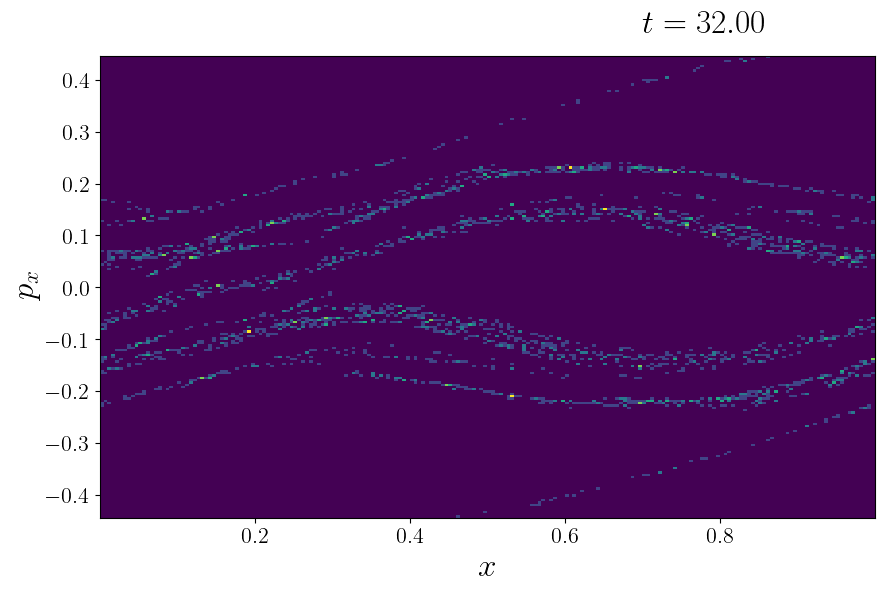

In [7]:
# We would like to plot the electron phase space distribution of the last output timestep
data.reload()
step = data.ptc_steps[-1]
# step = 40
data.load(step)
print(data.time)

tick_size = 16
label_size = 24

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10.0, 6.0)
fig.patch.set_facecolor('w')

print(data.tracked_ptc_p1.shape)
e_x1 = data.tracked_ptc_x1[flag_to_species(data.tracked_ptc_flag) == 0]
e_p1 = data.tracked_ptc_p1[flag_to_species(data.tracked_ptc_flag) == 0]
p_x1 = data.tracked_ptc_x1[flag_to_species(data.tracked_ptc_flag) == 1]
p_p1 = data.tracked_ptc_p1[flag_to_species(data.tracked_ptc_flag) == 1]
print(e_x1)
ax.hist2d(e_x1, e_p1, bins=200)

ax.tick_params(labelsize=tick_size)
ax.set_xlabel(r'$x$', fontsize=label_size)
ax.set_ylabel(r'$p_x$', fontsize=label_size)
ax.text(0.7, 1.05, f'$t = {data.time:.2f}$',transform=ax.transAxes,
        fontsize=label_size)

In [8]:
# This loop plots electron phase space for all output time steps, and save the plots in the "python/plots/" directory
if not os.path.exists("plots"):
    os.makedirs("plots")

tick_size = 16
label_size = 24
data.reload()
for step in data.fld_steps:
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(10.0, 6.0)
    fig.patch.set_facecolor('w')

    data.load(step)
    
    e_x1 = data.tracked_ptc_x1[flag_to_species(data.tracked_ptc_flag) == 0]
    e_p1 = data.tracked_ptc_p1[flag_to_species(data.tracked_ptc_flag) == 0]
    ax.hist2d(e_x1, e_p1, bins=200, rasterized=True)

    ax.tick_params(labelsize=tick_size)
    ax.set_xlabel(r'$x$', fontsize=label_size)
    ax.set_ylabel(r'$p_x$', fontsize=label_size)
    
    ax.text(0.7, 1.05, f'$t = {data.time:.2f}$',transform=ax.transAxes,
            fontsize=label_size)
    fig.savefig(f'plots/{step:05d}.png')
    plt.close(fig)

fld keys are: ['B1', 'B2', 'B3', 'B_sqr', 'E1', 'E2', 'E3', 'E_sqr', 'J1', 'J2', 'J3', 'Rho_e', 'Rho_p', 'divB', 'divE', 'flux', 'flux_e1', 'flux_e2', 'flux_e3', 'flux_e4', 'flux_p1', 'flux_p2', 'flux_p3', 'flux_p4', 'step', 'stress_e1', 'stress_e10', 'stress_e2', 'stress_e3', 'stress_e4', 'stress_e5', 'stress_e6', 'stress_e7', 'stress_e8', 'stress_e9', 'stress_p1', 'stress_p10', 'stress_p2', 'stress_p3', 'stress_p4', 'stress_p5', 'stress_p6', 'stress_p7', 'stress_p8', 'stress_p9', 'time', 'B', 'J']
ptc keys are: ['step', 'time', 'tracked_ptc_E', 'tracked_ptc_flag', 'tracked_ptc_id', 'tracked_ptc_p1', 'tracked_ptc_p2', 'tracked_ptc_p3', 'tracked_ptc_weight', 'tracked_ptc_x1', 'tracked_ptc_x2', 'tracked_ptc_x3']


In [9]:
# growth rate
data.reload()
UE = np.zeros(len(data.fld_steps))
ts = np.zeros_like(UE)
gamma = np.sqrt(1.0 + data.conf['p0']**2)
print(gamma)
km = np.sqrt(3.0/8.0/gamma)/data.conf['p0']
print("km is ", km)
omega_p = np.sqrt(data.conf["rho_b"])
print("omega_p is", omega_p)
for step in data.fld_steps:
    data.load_fld(step)
    UE[step] = np.sum(np.sqrt(data.E1**2))
    ts[step] = data.time * omega_p
    print(step, ts[step], UE[step])

fld keys are: ['B1', 'B2', 'B3', 'B_sqr', 'E1', 'E2', 'E3', 'E_sqr', 'J1', 'J2', 'J3', 'Rho_e', 'Rho_p', 'divB', 'divE', 'flux', 'flux_e1', 'flux_e2', 'flux_e3', 'flux_e4', 'flux_p1', 'flux_p2', 'flux_p3', 'flux_p4', 'step', 'stress_e1', 'stress_e10', 'stress_e2', 'stress_e3', 'stress_e4', 'stress_e5', 'stress_e6', 'stress_e7', 'stress_e8', 'stress_e9', 'stress_p1', 'stress_p10', 'stress_p2', 'stress_p3', 'stress_p4', 'stress_p5', 'stress_p6', 'stress_p7', 'stress_p8', 'stress_p9', 'time', 'B', 'J']
ptc keys are: ['step', 'time', 'tracked_ptc_E', 'tracked_ptc_flag', 'tracked_ptc_id', 'tracked_ptc_p1', 'tracked_ptc_p2', 'tracked_ptc_p3', 'tracked_ptc_weight', 'tracked_ptc_x1', 'tracked_ptc_x2', 'tracked_ptc_x3']
1.0111874208078342
km is  4.059836517374186
omega_p is 1.0
0 0.0 0.001573212561197579
1 0.20000000000000015 0.04461589828133583
2 0.4000000000000003 0.06358020007610321
3 0.6000000000000004 0.07502330839633942
4 0.8000000000000006 0.09591054916381836
5 1.0000000000000007 0.10776

0.4917252579516861 1.0111874208078342
0.15


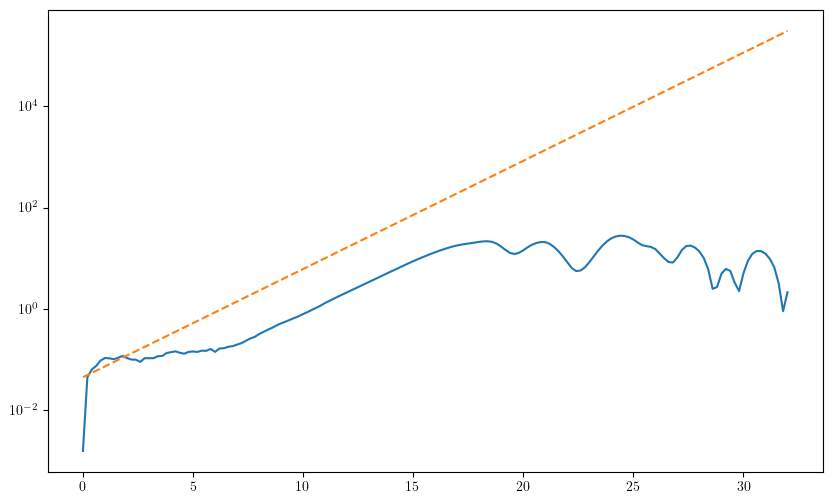

In [10]:
tick_size = 25
label_size = 30

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10.0, 6.0)
fig.patch.set_facecolor('w')

ax.plot(ts, UE)
ax.set_yscale('log')
# ax.set_xlim(1,20)
# ax.set_ylim(1e-1, 1e3)

rate = 1.0 / (2.0 * np.sqrt(gamma**3))
print(rate, np.sqrt(1.0 + data.conf['p0']**2))
ys = 4.5e-2 * np.exp((ts-0) * rate)
ax.plot(ts, ys, '--')
print(data.conf['p0'])